### base preprocessing for NLP

1. Load text
2. Tokenize text(ex. stemming, morph analyzing)
3. Tag tokens(ex: POS, NER)
4. Token(feature) selection and/or filter/rank tokens(ex: stopword removal, TF-IDF)
5. etc(ex. calculate word/document similarities, cluster docs)

In [2]:
import nltk
import konlpy

In [3]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [5]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.morphs(doc_ko)

In [7]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [8]:
ko

<Text: 대한민국 국회 의안 제 1809890호>

In [10]:
ko.tokens

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '(',
 '정의화',
 '의원',
 '대표',
 '발의',
 ')',
 '의',
 '안',
 '번',
 '호',
 '9890',
 '발의',
 '연월일',
 ':',
 '2010',
 '.',
 '11',
 '.',
 '12',
 '.',
 '발',
 '의',
 '자',
 ':',
 '정의화',
 '․',
 '이명수',
 '․',
 '김을동',
 '이사철',
 '․',
 '여상규',
 '․',
 '안규백',
 '황영철',
 '․',
 '박영아',
 '․',
 '김정훈',
 '김학송',
 '의원',
 '(',
 '10',
 '인',
 ')',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '의',
 '경우',
 '에도',
 '부모',
 '의',
 '따뜻한',
 '사랑',
 '과',
 '보살핌',
 '이',
 '필요',
 '한',
 '나이',
 '이나',
 ',',
 '현재',
 '공무원',
 '이',
 '자녀',
 '를',
 '양육',
 '하기',
 '위하여',
 '육아휴직',
 '을',
 '할',
 '수',
 '있는',
 '자녀',
 '의',
 '나이',
 '는',
 '만',
 '6',
 '세',
 '이하',
 '로',
 '되어',
 '있어',
 '초등학교',
 '저학년',
 '인',
 '자녀',
 '를',
 '돌보기',
 '위해서',
 '는',
 '해당',
 '부모님',
 '은',
 '일자리',
 '를',
 '그만',
 '두어',
 '야',
 '하고',
 '이는',
 '곧',
 '출산',
 '의욕',
 '을',
 '저하',
 '시키는',
 '문제',
 '로',
 '이어질',
 '수',
 '있',
 '을',
 '것임',
 '.',
 '따라서',
 '육아휴직',
 '이',
 '가능한',
 '자녀',
 '의',
 '연령',
 '을',
 '만',
 '8',
 '세',
 '이하',
 '로',
 '개정',
 '하려',
 '는',
 '것임',
 '(',


#### 한글이 네모로 깨져보일 때 configuration

In [ ]:
from matplotlib import font_manager, rc

In [25]:
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [19]:
import matplotlib

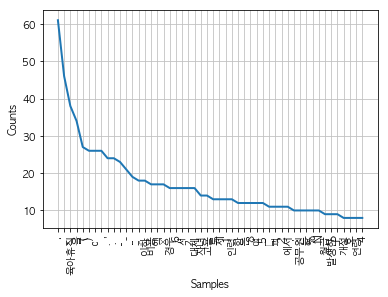

In [28]:
ko.plot(50)

In [29]:
ko.count('초등학교')

6

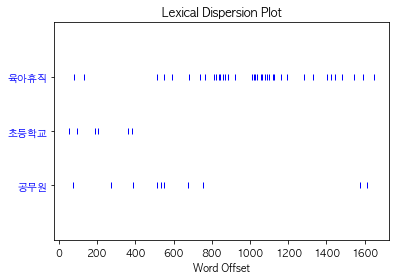

In [30]:
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [31]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 ․ 김정훈 김학송 의원 ( 10 인 ) 제안 이유 및 주요 내용 초등학교 저학년 의 경우 에도 부모 의 따뜻한 사랑 과 보살핌 이 필요 한
 을 할 수 있는 자녀 의 나이 는 만 6 세 이하 로 되어 있어 초등학교 저학년 인 자녀 를 돌보기 위해서 는 해당 부모님 은 일자리 를 
 다 . 제 63 조제 2 항제 4 호 중 “ 만 6 세 이하 의 초등학교 취학 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 
 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 에는 초등학교 2 학년 이하 를 말한 다 ) 의 자녀 를 ” 로 한 다 . 부 
 . ∼ 3 . ( 현행 과 같 음 ) 4 . 만 6 세 이하 의 초등학교 취 4 . 만 8 세 이하 ( 취학 중인 경우 학 전 자녀 를 양
세 이하 ( 취학 중인 경우 학 전 자녀 를 양육 하기 위하 에는 초등학교 2 학년 이하 를 여 필요하거 나 여자 공무원 이 말한 다 ) 의


In [32]:
ko.similar('자녀')

논의


In [35]:
tags_ko = t.pos('작고 노란 강아지가 페르시안 고양이에게 짖었다')
tags_ko

[('작고', 'Noun'),
 ('노란', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었', 'Noun'),
 ('다', 'Josa')]

In [36]:
parser_ko = nltk.RegexpParser('NP: {<Adjective>*<Noun>*}')
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.draw()

In [37]:
ko.vocab()

FreqDist({'%': 10,
          '(': 27,
          ')': 26,
          ').': 1,
          '+': 3,
          ',': 26,
          '-': 21,
          '--------': 1,
          '----------': 1,
          '-------------------------': 1,
          '---------------------------': 2,
          '----------------------------': 4,
          '--------------.': 1,
          '-------------.---------------': 1,
          '.': 61,
          '/': 1,
          '0': 5,
          '02': 1,
          '056': 1,
          '1': 13,
          '10': 6,
          '11': 2,
          '12': 1,
          '145': 1,
          '184': 1,
          '185': 1,
          '19': 1,
          '2': 11,
          '20': 1,
          '200': 2,
          '2007': 3,
          '2008': 1,
          '2009': 1,
          '2010': 3,
          '2011': 6,
          '21': 2,
          '29': 1,
          '291': 1,
          '3': 8,
          '30': 1,
          '34': 1,
          '35': 1,
          '396': 1,
          '4': 8,
          '40': 7,
     

In [39]:
data = ko.vocab().items()
data

dict_items([('지방공무원법', 4), ('일부', 4), ('개정', 8), ('법률', 7), ('안', 6), ('(', 27), ('정의화', 2), ('의원', 2), ('대표', 1), ('발의', 2), (')', 26), ('의', 46), ('번', 1), ('호', 8), ('9890', 1), ('연월일', 1), (':', 10), ('2010', 3), ('.', 61), ('11', 2), ('12', 1), ('발', 1), ('자', 24), ('․', 11), ('이명수', 1), ('김을동', 1), ('이사철', 1), ('여상규', 1), ('안규백', 1), ('황영철', 1), ('박영아', 1), ('김정훈', 1), ('김학송', 1), ('10', 6), ('인', 5), ('제안', 1), ('이유', 1), ('및', 4), ('주요', 1), ('내용', 1), ('초등학교', 6), ('저학년', 2), ('경우', 16), ('에도', 2), ('부모', 1), ('따뜻한', 1), ('사랑', 1), ('과', 11), ('보살핌', 1), ('이', 26), ('필요', 1), ('한', 12), ('나이', 2), ('이나', 2), (',', 26), ('현재', 3), ('공무원', 10), ('자녀', 14), ('를', 18), ('양육', 2), ('하기', 2), ('위하여', 2), ('육아휴직', 38), ('을', 34), ('할', 5), ('수', 7), ('있는', 2), ('는', 10), ('만', 19), ('6', 16), ('세', 16), ('이하', 18), ('로', 13), ('되어', 1), ('있어', 1), ('돌보기', 1), ('위해서', 1), ('해당', 1), ('부모님', 1), ('은', 12), ('일자리', 1), ('그만', 1), ('두어', 1), ('야', 2), ('하고', 5), ('이는', 1), ('곧', 1), ('출산

In [40]:
import csv
with open('words.csv', 'w', encoding='utf-8') as f:
    f.write('word, freq\n')
    writer = csv.writer(f)
    writer.writerows(data)